In [1]:

# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [2]:
# Load housing dataset
california = fetch_california_housing()
X = california.data
y = california.target


In [3]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [4]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
# Build the Deep Neural Network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Linear output for regression
])


C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [7]:
# Train the model
history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 1.8137 - mae: 0.9641 - val_loss: 0.4561 - val_mae: 0.4917
Epoch 2/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3961 - mae: 0.4482 - val_loss: 0.4090 - val_mae: 0.4603
Epoch 3/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3819 - mae: 0.4381 - val_loss: 0.3835 - val_mae: 0.4449
Epoch 4/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3646 - mae: 0.4239 - val_loss: 0.3886 - val_mae: 0.4433
Epoch 5/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3454 - mae: 0.4135 - val_loss: 0.3537 - val_mae: 0.4200
Epoch 6/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3241 - mae: 0.4014 - val_loss: 0.3539 - val_mae: 0.4182
Epoch 7/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3109 - mae: 0.3929 - val_loss: 0.3527 - val_mae: 0.4275
Epoch 8/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3566 - mae: 0.3987 - val_loss: 0.3354 - val_mae: 0.3946
Epoch 9/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/

In [8]:
# Evaluate the model
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f"\nMean Absolute Error on Test Data: {mae:.2f}")
# Make predictions
y_pred = model.predict(X_test_scaled)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2616 - mae: 0.3491

Mean Absolute Error on Test Data: 0.35
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [9]:
# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 0.27
R^2 Score: 0.79


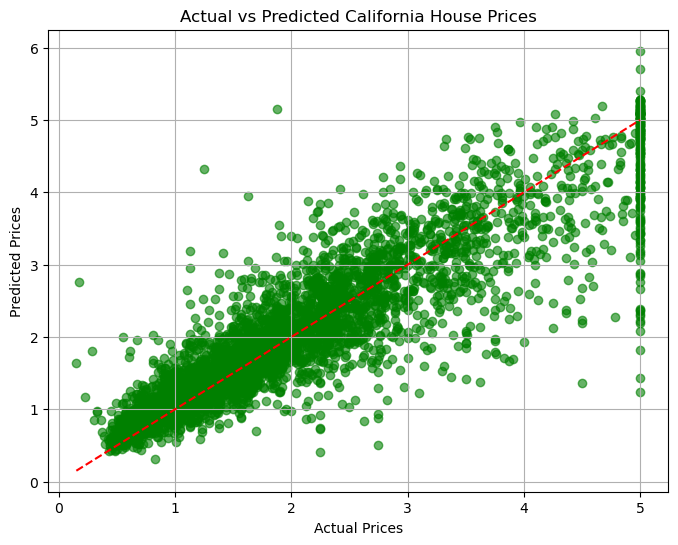

In [10]:
# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted California House Prices')
plt.grid(True)
plt.show()
